all exercises based on [Introduction to Deep Learning for NLP](https://wikidocs.net/49071)

## MLP: MultiLayer Perceptron
FFNN(피드 포워드 신경망)의 가장 기본적인 형태.

### 1. Keras의 texts_to_matrix()


In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [3]:
# 정수 인코딩
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index) # 등장 빈도순으로 넘버링 된 것 같다! (정수 인코딩 챕터에 나왔을 것)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [4]:
print(t.texts_to_matrix(texts, mode= 'count')) # 4가지 모드 있음. binary, count, freq, tfidf (단어의 순서정보는 보존되지 않음)
# count -> 문서단어행렬 생성 (DTM_cf. BoW 기반. 단어 순서 정보 보존되지 않음)
# 각 문서내 숫자들의 인덱스는 _내장 리스트 안의 인덱스는_ 위읭 word_index에 해당
# 단 주의할 점! word_index의 인덱스는 단어 9개에 대해 1~9로 주어졌는데, 행렬은 인덱스 0부터 만들어져서 칼럼도 10개, 맨 앞(인덱스 0)은 해당하는 단어 없음.

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [6]:
print(t.texts_to_matrix(texts, mode = 'binary')) # count와 같지만 '있다 없다'만 표시. 단어의 존재 유무로만 행렬 만듦

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [7]:
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2)) # TF-IDF 행렬 만듦. (sklearn의 TfidfVectorizer과 의도는 같고 구체적으로 계산하는 식은 다름..)

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [ ]:
print(t.texts_to_matrix(texts, mode = 'freq').round(2)) # 각 문서에 해당 단어 등장 횟수/그 문서의 전체 단어 개수(중복도 셈. len이라 생각해)


### 2. 20개 뉴스  그룹 (Twenty Newsgroups)

In [8]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [9]:
newsdata = fetch_20newsgroups(subset = 'train') # 이렇게 하면 훈련 데이터만 리턴함


In [10]:
print(newsdata.keys()) # 훈련에 사용할 건 data, target

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [11]:
print('훈련용 샘플 개수: {}'.format(len(newsdata.data))) 

훈련용 샘플 개수: 11314


In [12]:
print('총 주제의 개수: {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
print('첫번째 샘플의 레이블: {}'.format(newsdata.target[0])) # 참고로 label은 0부터 있음

첫번째 샘플의 레이블: 7


In [14]:
print('7번 레이블이 의미하는 주제: {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제: rec.autos


In [22]:
print(newsdata.data[0]) # 첫번째 샘플 data 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [23]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # series로 넣어줘야 함
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [25]:
data.isnull().values.any()

False

In [26]:
print('중복 제외한 샘플 수:{}'.format(data['email'].nunique()))
print('중복 제외한 주제 수:{}'.format(data['target'].nunique()))

중복 제외한 샘플 수:11314
중복 제외한 주제 수:20


In [29]:
len(data['email'])

11314

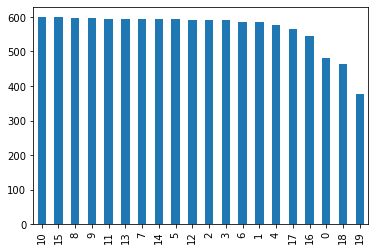

In [30]:
data['target'].value_counts().plot(kind = 'bar')

In [39]:
type(data.groupby('target').size())

pandas.core.series.Series

In [40]:
print(data.groupby('target').size().reset_index(drop = False, name = 'count')) # series는 1차원 배열인가? reset_index했더니 dataframe이 되었네

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


## 학습 준비

In [41]:
newsdata_test = fetch_20newsgroups(subset = 'test', shuffle = True) # 'test' 기재하면 테스트 데이터만 리턴
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [42]:
max_words = 10000 
num_classes = 20 # 레이블 수

In [43]:
def prepare_data(train_data, test_data, mode): # 전처리 함수 만들기
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용 (num_words 역할이 정확히 뭐였지. tokenize 하고 단어수 부족하면 0 채우고 넘치면 자르고?!)
    t.fit_on_texts(train_data) # train data 기준으로 word 사전 만들 것 (단어 토큰화)
    X_train = t.texts_to_matrix(train_data, mode = mode) # DMT 같은 거 만듦 train data 기준으로
    X_test = t.texts_to_matrix(test_data, mode = mode) # test data 기준으로 
    return X_train, X_test, t.index_word

In [44]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes) # 원핫인코딩 - 행렬이 만들어짐 ---- valued numbers가 아니라 왜 원핫인코딩으로 했었는지 복습하기
y_test = to_categorical(test_label, num_classes) # 이렇게 label을 다 원핫인코딩!

In [45]:
print('훈련 샘플 본문 크기: {}'.format(X_train.shape))
print('훈련 샘플 레이블 크기: {}'.format(y_train.shape))
print('테스트 샘플 본문 크기: {}'.format(X_test.shape))
print('테스트 샘플 레이블 크기: {}'.format(y_test.shape))

훈련 샘플 본문 크기: (11314, 10000)
훈련 샘플 레이블 크기: (11314, 20)
테스트 샘플 본문 크기: (7532, 10000)
테스트 샘플 레이블 크기: (7532, 20)


In [48]:
index_to_word # tokenize 하면 index_word는 1번부터 시작해 빈도수 높은 순으로 쭉 나열된 dictionary!!!

{1: 'the',
 2: 'to',
 3: 'of',
 4: 'a',
 5: "'ax",
 6: 'and',
 7: 'in',
 8: 'i',
 9: 'is',
 10: 'that',
 11: 'it',
 12: 'for',
 13: 'you',
 14: 'from',
 15: 'edu',
 16: 'on',
 17: 'this',
 18: 'be',
 19: 'are',
 20: 'not',
 21: 'have',
 22: 'with',
 23: 'as',
 24: '1',
 25: 'or',
 26: 'was',
 27: 'if',
 28: 'but',
 29: 'subject',
 30: 'they',
 31: 'com',
 32: 'lines',
 33: 'at',
 34: 'organization',
 35: 'by',
 36: '2',
 37: 'an',
 38: 'my',
 39: 'can',
 40: 'x',
 41: '3',
 42: 'what',
 43: '0',
 44: 'all',
 45: 'will',
 46: 'm',
 47: 'there',
 48: 'would',
 49: 'one',
 50: 'do',
 51: "'",
 52: 'about',
 53: 're',
 54: 'we',
 55: 'writes',
 56: 'so',
 57: 'he',
 58: 'your',
 59: 'no',
 60: 'has',
 61: 'article',
 62: 'any',
 63: 'me',
 64: 'some',
 65: 'who',
 66: 'out',
 67: 'which',
 68: '4',
 69: 'q',
 70: 'more',
 71: 'like',
 72: 'people',
 73: "don't",
 74: 'when',
 75: '5',
 76: 'just',
 77: 'university',
 78: 'posting',
 79: 'their',
 80: 'were',
 81: 'up',
 82: 'r',
 83: 'p',


### 3. 다층 퍼셉트론 (MLP) 사용한 텍스트 분류

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [51]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu')) # 입력층은 input shape 필히 있어야 함
    model.add(Dropout(0.5))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax')) # 각 클래스 있는 vector로 반환
    
    model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    model.fit(X_train, y_train, batch_size = 128, epochs = 5, verbose = 1, validation_split = 0.1)
    score = model.evaluate(X_test, y_test, batch_size = 128, verbose = 0)
    return score[1]

In [52]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장
for mode in modes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score= fit_and_evaluate(X_train, y_train, X_test, y_test)
    print(mode+' 모드의 테스트 정확도: ',score)

Epoch 1/5
80/80 [==============================] - 1s 18ms/step - loss: 2.3167 - accuracy: 0.3269 - val_loss: 1.0033 - val_accuracy: 0.8118
Epoch 2/5
80/80 [==============================] - 1s 17ms/step - loss: 0.8928 - accuracy: 0.7577 - val_loss: 0.4520 - val_accuracy: 0.8949
Epoch 3/5
80/80 [==============================] - 1s 17ms/step - loss: 0.4319 - accuracy: 0.8865 - val_loss: 0.3431 - val_accuracy: 0.9090
Epoch 4/5
80/80 [==============================] - 1s 16ms/step - loss: 0.2658 - accuracy: 0.9335 - val_loss: 0.3089 - val_accuracy: 0.9125
Epoch 5/5
80/80 [==============================] - 1s 16ms/step - loss: 0.1630 - accuracy: 0.9615 - val_loss: 0.3052 - val_accuracy: 0.9117
binary 모드의 테스트 정확도:  0.82753586769104
Epoch 1/5
80/80 [==============================] - 1s 17ms/step - loss: 2.7866 - accuracy: 0.2322 - val_loss: 1.7611 - val_accuracy: 0.7120
Epoch 2/5
80/80 [==============================] - 1s 16ms/step - loss: 1.5686 - accuracy: 0.6079 - val_loss: 0.7787 - val